<a href="https://colab.research.google.com/github/EnoshVechalapu/Breast-cancer-prediction/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study the Effect of Network Depth:**

**Using Breast Cancer Dataset**

### **Importing necessary libraries**

In [67]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")



Using device: cuda


### **Data Collection and preprocessing**

In [68]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X.shape

(569, 30)

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)


### **Defining Neural Network Architecture**

In [70]:
# Define neural network models 1) SimpleNN 2) ModerateNN 3) DeepNN

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

class ModerateNN(nn.Module):
    def __init__(self):
        super(ModerateNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        return x

### **Training the Neural Network**

In [71]:
# Train model function
def train_model(model, X_train, y_train, epochs=50, lr=0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            train_outputs = (outputs >= 0.5).float()
            # Move tensors to CPU and convert to NumPy arrays before using accuracy_score
            accuracy = accuracy_score(y_train.cpu().numpy(), train_outputs.cpu().numpy())
            train_accuracies.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Train Accuracy: {accuracy:.4f}")

    return train_accuracies

# Instantiate the models
simple_model = SimpleNN().to(device)
moderate_model = ModerateNN().to(device)
deep_model = DeepNN().to(device)

# Train the models and collect training accuracies
print("Training SimpleNN:")
simple_train_accuracies = train_model(simple_model, X_train_tensor, y_train_tensor)

print("\nTraining ModerateNN:")
moderate_train_accuracies = train_model(moderate_model, X_train_tensor, y_train_tensor)

print("\nTraining DeepNN:")
deep_train_accuracies = train_model(deep_model, X_train_tensor, y_train_tensor)



Training SimpleNN:
Epoch [10/50], Train Accuracy: 0.8022
Epoch [20/50], Train Accuracy: 0.9231
Epoch [30/50], Train Accuracy: 0.9407
Epoch [40/50], Train Accuracy: 0.9516
Epoch [50/50], Train Accuracy: 0.9604

Training ModerateNN:
Epoch [10/50], Train Accuracy: 0.7033
Epoch [20/50], Train Accuracy: 0.9297
Epoch [30/50], Train Accuracy: 0.9407
Epoch [40/50], Train Accuracy: 0.9451
Epoch [50/50], Train Accuracy: 0.9560

Training DeepNN:
Epoch [10/50], Train Accuracy: 0.3714
Epoch [20/50], Train Accuracy: 0.3714
Epoch [30/50], Train Accuracy: 0.3714
Epoch [40/50], Train Accuracy: 0.4286
Epoch [50/50], Train Accuracy: 0.9363


### **Plotting Data**

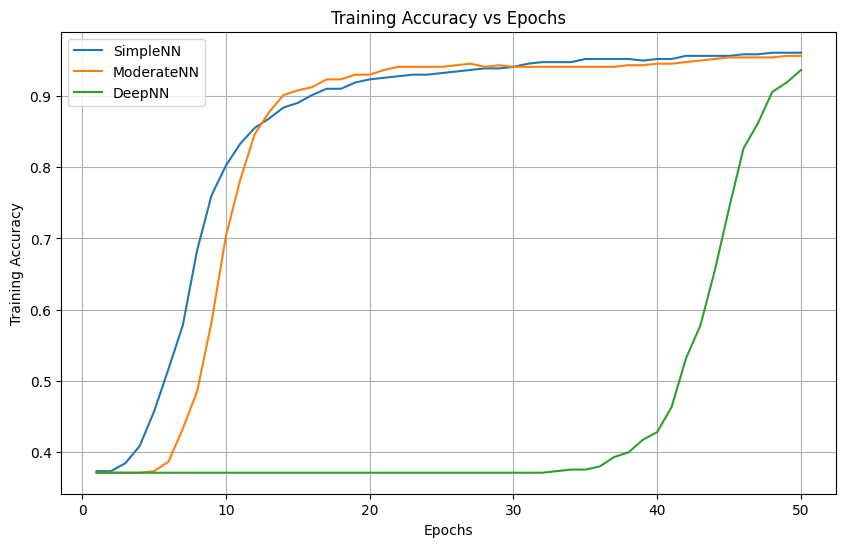

In [72]:
# Plotting the training accuracies
epochs = range(1, 51)

plt.figure(figsize=(10, 6))
plt.plot(epochs, simple_train_accuracies, label='SimpleNN')
plt.plot(epochs, moderate_train_accuracies, label='ModerateNN')
plt.plot(epochs, deep_train_accuracies, label='DeepNN')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

### **Evaluating Test data**



In [73]:
# Evaluate model function
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        outputs = (outputs >= 0.5).float()
        # Move tensors to CPU and convert to NumPy arrays before using accuracy_score
        accuracy = accuracy_score(y_test.cpu().numpy(), outputs.cpu().numpy())
        return accuracy

# Evaluate the models on the test dataset
simple_accuracy = evaluate_model(simple_model, X_test_tensor, y_test_tensor)
moderate_accuracy = evaluate_model(moderate_model, X_test_tensor, y_test_tensor)
deep_accuracy = evaluate_model(deep_model, X_test_tensor, y_test_tensor)

# Print the performance summary
print("Performance of Different Neural Network Depths on Breast Cancer Data:")
print(f"SimpleNN Test Accuracy: {simple_accuracy:.4f}")
print(f"ModerateNN Test Accuracy: {moderate_accuracy:.4f}")
print(f"DeepNN Test Accuracy: {deep_accuracy:.4f}")

Performance of Different Neural Network Depths on Breast Cancer Data:
SimpleNN Test Accuracy: 0.9649
ModerateNN Test Accuracy: 0.9649
DeepNN Test Accuracy: 0.9474


# **Study the effect of Regularizers**

### **Importing necessary libraries**

In [ ]:
# all done above , not doing once again

### **Data Collection and preprocessing**

In [ ]:
# all done above , not doing once again

### **Defining Neural Network Architecture with regularizers**

In [77]:
class SimpleNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

class ModerateNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(ModerateNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(32, 16)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.sigmoid(self.fc4(x))
        return x

class DeepNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(32, 16)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(16, 8)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.fc5 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout4(x)
        x = self.sigmoid(self.fc5(x))
        return x


### **Training the Neural Network**

In [78]:
def train_model(model, X_train, y_train, epochs=100, lr=0.001, weight_decay=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    train_accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()


        with torch.no_grad():
            train_outputs = (outputs >= 0.5).float()
            accuracy = accuracy_score(y_train.cpu().numpy(), train_outputs.cpu().numpy())
            train_accuracies.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Train Accuracy: {accuracy:.4f}")

    return train_accuracies


### **Plotting Data**

Training SimpleNN:
Epoch [10/100], Train Accuracy: 0.8044
Epoch [20/100], Train Accuracy: 0.8703
Epoch [30/100], Train Accuracy: 0.9099
Epoch [40/100], Train Accuracy: 0.9253
Epoch [50/100], Train Accuracy: 0.9385
Epoch [60/100], Train Accuracy: 0.9538
Epoch [70/100], Train Accuracy: 0.9670
Epoch [80/100], Train Accuracy: 0.9758
Epoch [90/100], Train Accuracy: 0.9802
Epoch [100/100], Train Accuracy: 0.9714

Training ModerateNN:
Epoch [10/100], Train Accuracy: 0.7033
Epoch [20/100], Train Accuracy: 0.7736
Epoch [30/100], Train Accuracy: 0.8286
Epoch [40/100], Train Accuracy: 0.8901
Epoch [50/100], Train Accuracy: 0.8945
Epoch [60/100], Train Accuracy: 0.9297
Epoch [70/100], Train Accuracy: 0.9560
Epoch [80/100], Train Accuracy: 0.9604
Epoch [90/100], Train Accuracy: 0.9692
Epoch [100/100], Train Accuracy: 0.9648

Training DeepNN:
Epoch [10/100], Train Accuracy: 0.6308
Epoch [20/100], Train Accuracy: 0.6308
Epoch [30/100], Train Accuracy: 0.6352
Epoch [40/100], Train Accuracy: 0.6418
Epo

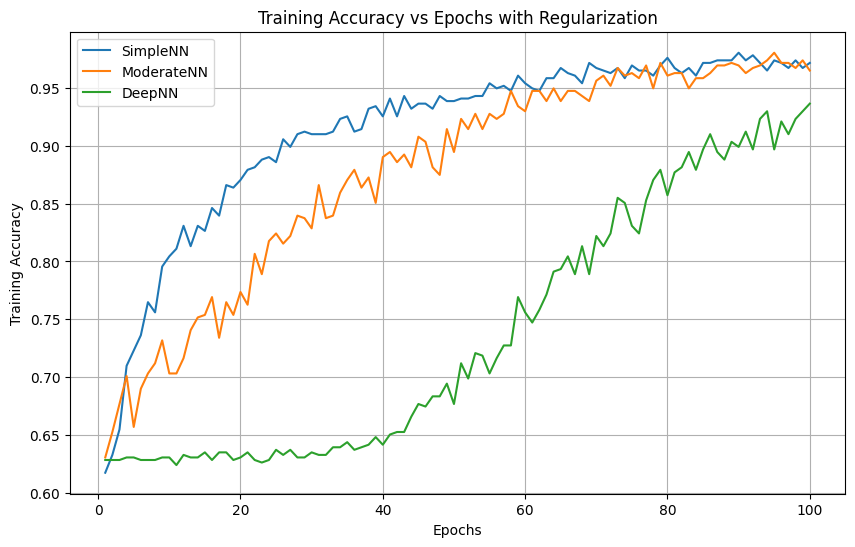

In [79]:
# Instantiate the models
simple_model = SimpleNN().to(device)
moderate_model = ModerateNN().to(device)
deep_model = DeepNN().to(device)

# Train the models and collect training accuracies
print("Training SimpleNN:")
simple_train_accuracies = train_model(simple_model, X_train_tensor, y_train_tensor)

print("\nTraining ModerateNN:")
moderate_train_accuracies = train_model(moderate_model, X_train_tensor, y_train_tensor)

print("\nTraining DeepNN:")
deep_train_accuracies = train_model(deep_model, X_train_tensor, y_train_tensor)

# Plotting the training accuracies
epochs = range(1, 101)

plt.figure(figsize=(10, 6))
plt.plot(epochs, simple_train_accuracies, label='SimpleNN')
plt.plot(epochs, moderate_train_accuracies, label='ModerateNN')
plt.plot(epochs, deep_train_accuracies, label='DeepNN')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Epochs with Regularization')
plt.legend()
plt.grid(True)
plt.show()


### **Evaluating Test data**



In [80]:
# Evaluate model function
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        outputs = (outputs >= 0.5).float()
        accuracy = accuracy_score(y_test.cpu().numpy(), outputs.cpu().numpy())
        return accuracy

# Evaluate the models on the test dataset
simple_accuracy = evaluate_model(simple_model, X_test_tensor, y_test_tensor)
moderate_accuracy = evaluate_model(moderate_model, X_test_tensor, y_test_tensor)
deep_accuracy = evaluate_model(deep_model, X_test_tensor, y_test_tensor)

# Print the test accuracies
print(f"SimpleNN Test Accuracy: {simple_accuracy:.4f}")
print(f"ModerateNN Test Accuracy: {moderate_accuracy:.4f}")
print(f"DeepNN Test Accuracy: {deep_accuracy:.4f}")




SimpleNN Test Accuracy: 0.9649
ModerateNN Test Accuracy: 0.9912
DeepNN Test Accuracy: 0.9825



###I tried different values for epochs , learning rate , weight decay.
###   For the some of the different values , i am attaching training vs epochs

Epochs 100 , learning rate 0.001 , weight decay 0.001 , dropout 0.5


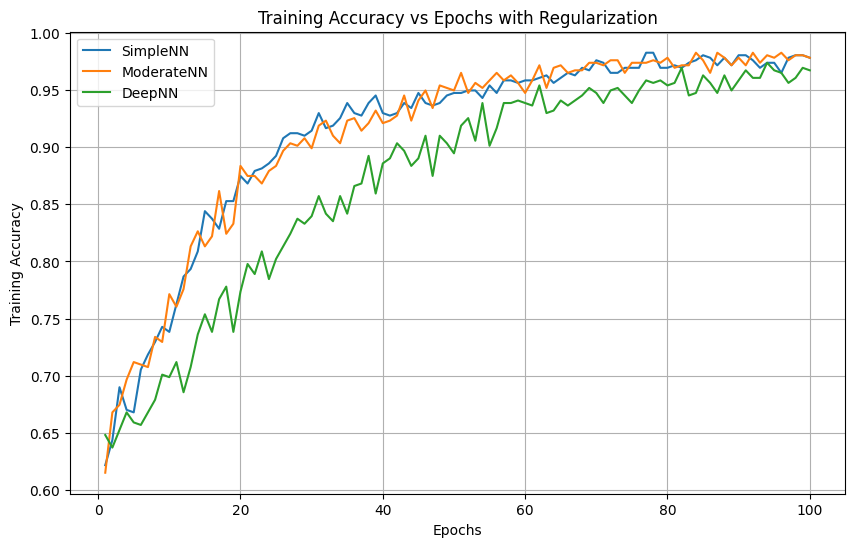



Epochs 100 , learning rate 0.001 , weight decay 0.01 , dropout 0.4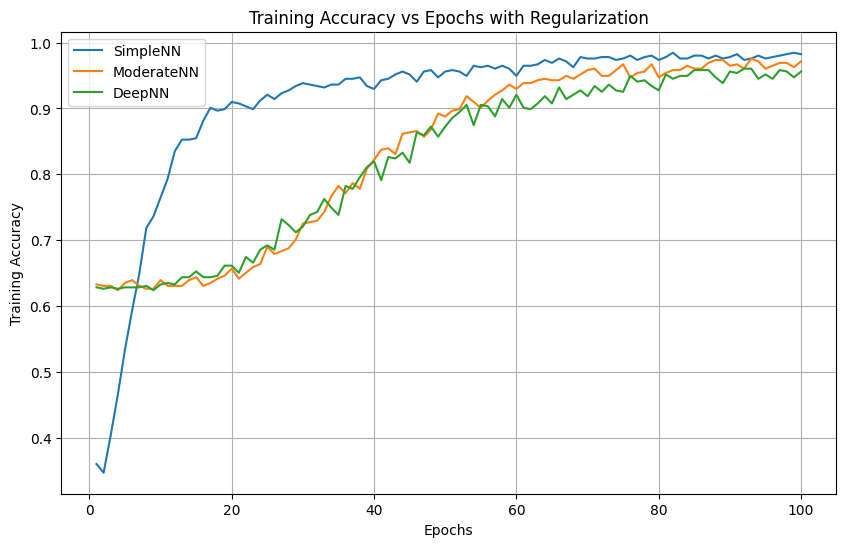





Epochs 50 , learning rate 0.001 , weight decay 0.01 , dropout 0.5

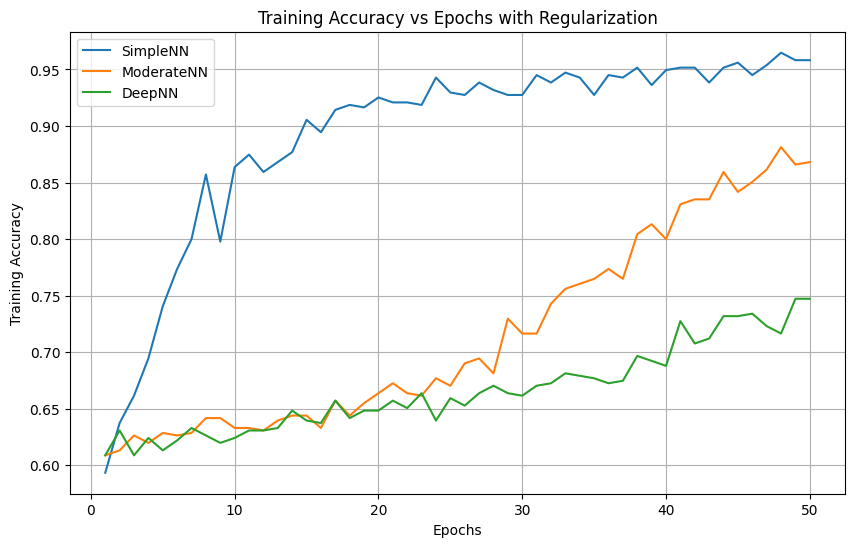


Epochs 50 , learning rate 0.001 , weight decay 0.01 , dropout 0.6
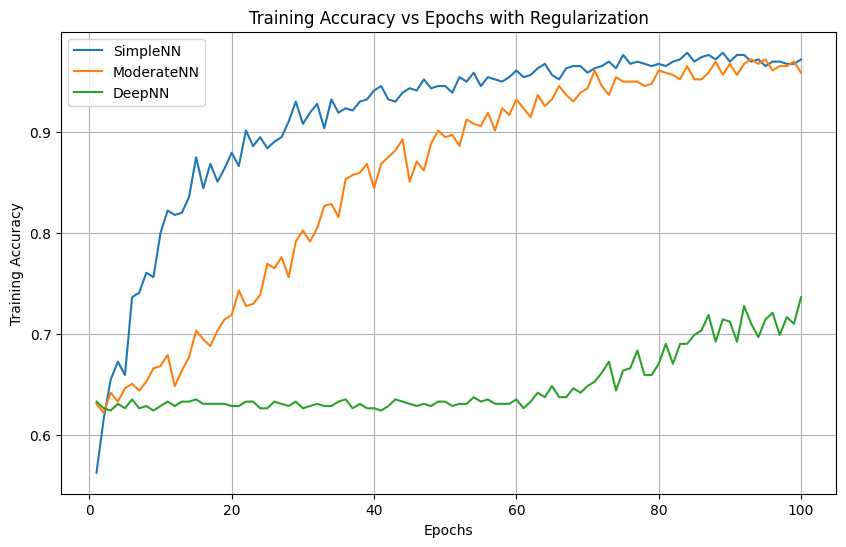